In [1]:
import numpy as np
from numba import jit, njit
from matplotlib import pyplot as plt

In [2]:
# ### Establish intial conditions
# # grid
# size = 101
# midpoint = int((size-1)/2)
# grid = np.zeros((size, size))
# # center point is occupied
# grid[midpoint, midpoint] = 1
# plt.imshow(grid)

In [115]:
### randomly instantiate particles 
# we can decide all the pseudorandom starting locations ahead of time 
# this saves computing time
# class particles():
#     def __init__(self, N, position, stuck, r=1.0):
#         self.N = N
#         self.position = position
#         self.stuck = stuck
#         self.r = r
#     def diffuse(self):
#         v = np.where(stuck==1, np.random.uniform(-1,1,size=position.shape),0)
#         new_pos = position + v
#         self.position = new_pos
def show(position, stuck_pos, lim=15):
    plt.figure(figsize=(6.8,6))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    ax.scatter(position[0], position[1], position[2], marker='.', color='red')
    ax.scatter(stuck_pos[0], stuck_pos[1], stuck_pos[2], marker='.', color='blue')
    plt.ylim(-lim,lim)
    plt.xlim(-lim,lim)
    plt.show();
    
def show2(position, stuck_pos, lim=15):
    plt.figure(figsize=(6.8,6))
    fig = plt.figure() 
    ax.scatter(position[0], position[1], c=position[2], marker='.')
    ax.scatter(stuck_pos[0], stuck_pos[1], c=stuck_pos[2], marker='.')
    plt.ylim(-lim,lim)
    plt.xlim(-lim,lim)
    plt.show();
    
def start_position(N, bound):
    x0, y0, z0 = spherical_start(N, bound)
    position = np.array([x0, y0, z0])
    return position

@njit
def fibonacci_sphere(samples,randomize=np.random.uniform()):
    rnd = randomize * samples

    points = np.zeros((3,samples))
    offset = 2.0/samples
    increment = np.pi * (3. - math.sqrt(5.));

    for i in range(samples):
        y = ((i * offset) - 1.0) + (offset / 2.0);
        r = np.sqrt(1 - y**2.0)

        phi = ((i + rnd) % samples) * increment

        x = np.cos(phi) * r
        z = np.sin(phi) * r

        points[:,i] = np.array([x,y,z])
    return points

In [116]:
### calculate the distance between two particles
@njit
def dist(p1, p2, i, j):
    d = np.sqrt(((p1[:,i] - p2[:,j])**2).sum())
    return d

### calculate the distance from the original center
@njit
def dist_center(p, i):
    d = np.sqrt(((p[:,i] - 0.0)**2).sum())
    return d

### Check for stuckness
@njit
def check(position, unstuck, stuck_pos, restarts, rest_ind, bound, wave, N):
    for i in range(N): # for each active particle
        if unstuck[i] == 1: # if the particle is not stuck
            d_center = dist_center(position, i) # check distance to the center
            if d_center > 1.3*bound:
                # reset if far away from the spawn line
                position[:,i] = restarts[:,rest_ind]
                rest_ind += 1 # increment so that restarts are different
            for j in range(NN): # then check every particle that does or will exist
                distance = dist(position, stuck_pos, i, j) # distance between these two particles.
                #print(i, j, (position[:,i] - stuck_pos[:,j]))
                if distance <= 2.0*r: # if these two particles are close enough
                    #print(i, 'stuck')
                    #print(i, 'stuck', d,(position[:,i] - stuck_pos[:,j]))
                    unstuck[i] = 0 # then i is no longer unstuck
                    stuck_pos[:, wave*N + i] = position[:, i] # record it's position 
                    break # break out of this loop and check the next particle
    return(unstuck, stuck_pos)

@njit
def diffuse(position, unstuck):
    v = unstuck * np.random.uniform(-1,1,size=position.shape)
    new_pos = position + v*dt
    return new_pos



In [117]:
#%timeit check(position, unstuck, stuck_pos, restarts, rest_ind, bound)   

<Figure size 489.6x432 with 0 Axes>

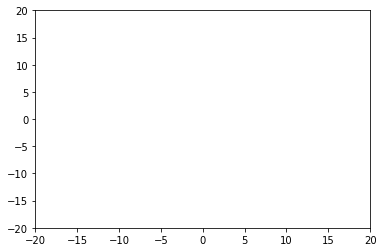

<Figure size 489.6x432 with 0 Axes>

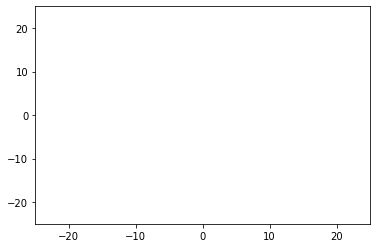

<Figure size 489.6x432 with 0 Axes>

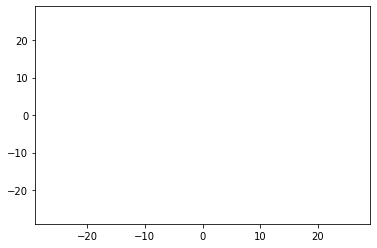

In [118]:
NN = 501 # Total number of particles     
N = 50 # number of particles active
wave = 0
dt = 1.0

bound0 = 20.0
r = 1.0
position = bound0*fibonacci_sphere(N)
unstuck = np.ones(N)
unstuck[0] = 0
stuck_pos = np.zeros((3, NN))

while wave*N+1 < NN: 
    bound = bound0 + 1.0*wave
    restarts = bound*fibonacci_sphere(N)
    rest_ind = 0
    if wave%5 == 0:
        show2(position, stuck_pos, lim=bound)
    while unstuck.sum()/N > 0.2:
        position = diffuse(position, unstuck)
        unstuck, stuck_pos = check(position, unstuck, stuck_pos, restarts, rest_ind, bound, wave, N)
    wave += 1
    position = bound*fibonacci_sphere(N)
    unstuck = np.ones(N)
show2(position, stuck_pos, lim=bound) 



In [144]:
q = 40.0
k = 10.0
Q=[q]
for i in range(20):
    q += k*i
    k = 0.75*k
    Q.append(q)

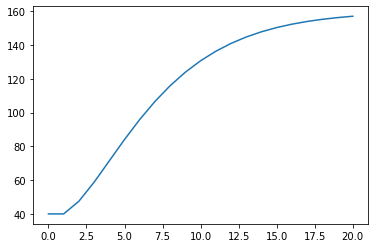

In [145]:
plt.plot(Q)

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 489.6x432 with 0 Axes>

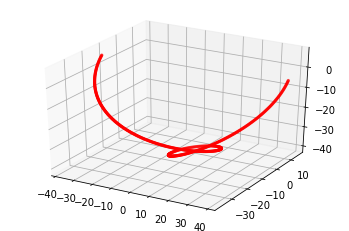

In [135]:
go()